<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Performance-measures" data-toc-modified-id="1.-Performance-measures-1">1. Performance measures</a></span></li><li><span><a href="#2.-Q-Learning" data-toc-modified-id="2.-Q-Learning-2">2. Q Learning</a></span><ul class="toc-item"><li><span><a href="#2.1-Learning-from-experts" data-toc-modified-id="2.1-Learning-from-experts-2.1">2.1 Learning from experts</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Decreasing-exploration" data-toc-modified-id="2.1.1-Decreasing-exploration-2.1.1">2.1.1 Decreasing exploration</a></span></li><li><span><a href="#2.1.2-Good-experts-and-bad-experts" data-toc-modified-id="2.1.2-Good-experts-and-bad-experts-2.1.2">2.1.2 Good experts and bad experts</a></span></li></ul></li><li><span><a href="#2.2-Learning-by-self-practice" data-toc-modified-id="2.2-Learning-by-self-practice-2.2">2.2 Learning by self-practice</a></span><ul class="toc-item"><li><span><a href="#learning-with-fixed-epsilon" data-toc-modified-id="learning-with-fixed-epsilon-2.2.1">learning with fixed epsilon</a></span></li><li><span><a href="#Learning-with-decreasing-exploration" data-toc-modified-id="Learning-with-decreasing-exploration-2.2.2">Learning with decreasing exploration</a></span></li></ul></li></ul></li><li><span><a href="#3.-Deep-Q-Learning" data-toc-modified-id="3.-Deep-Q-Learning-3">3. Deep Q-Learning</a></span><ul class="toc-item"><li><span><a href="#3.1-Learning-from-experts" data-toc-modified-id="3.1-Learning-from-experts-3.1">3.1 Learning from experts</a></span><ul class="toc-item"><li><span><a href="#Q11-Standard-training-with-fixed--$\epsilon$" data-toc-modified-id="Q11-Standard-training-with-fixed--$\epsilon$-3.1.1">Q11 Standard training with fixed  $\epsilon$</a></span></li><li><span><a href="#Q12-Training-without-the-replay-buffer-and-with-a-batch-size-of-1" data-toc-modified-id="Q12-Training-without-the-replay-buffer-and-with-a-batch-size-of-1-3.1.2">Q12 Training without the replay buffer and with a batch size of 1</a></span></li><li><span><a href="#Q13-Training-with-decreasing-$\epsilon$-given-different-values-of-$n*$" data-toc-modified-id="Q13-Training-with-decreasing-$\epsilon$-given-different-values-of-$n*$-3.1.3">Q13 Training with decreasing $\epsilon$ given different values of $n*$</a></span></li><li><span><a href="#Q14-Training-with-different-$\epsilon_{opt}$-given-best-value-of-$n*$" data-toc-modified-id="Q14-Training-with-different-$\epsilon_{opt}$-given-best-value-of-$n*$-3.1.4">Q14 Training with different $\epsilon_{opt}$ given best value of $n*$</a></span></li><li><span><a href="#Q15-Reporting-best-results" data-toc-modified-id="Q15-Reporting-best-results-3.1.5">Q15 Reporting best results</a></span></li></ul></li><li><span><a href="#3.2-Learning-by-self-practice" data-toc-modified-id="3.2-Learning-by-self-practice-3.2">3.2 Learning by self-practice</a></span><ul class="toc-item"><li><span><a href="#Q16-Training-with-different-fixed--$\epsilon$" data-toc-modified-id="Q16-Training-with-different-fixed--$\epsilon$-3.2.1">Q16 Training with different fixed  $\epsilon$</a></span></li><li><span><a href="#Q17-Training-with-decreasing--$\epsilon$-given-different-values-of-$n*$" data-toc-modified-id="Q17-Training-with-decreasing--$\epsilon$-given-different-values-of-$n*$-3.2.2">Q17 Training with decreasing  $\epsilon$ given different values of $n*$</a></span></li><li><span><a href="#Q18-Reporting-best-results" data-toc-modified-id="Q18-Reporting-best-results-3.2.3">Q18 Reporting best results</a></span></li><li><span><a href="#Q19-Visualizing-Q-values" data-toc-modified-id="Q19-Visualizing-Q-values-3.2.4">Q19 Visualizing Q values</a></span></li></ul></li></ul></li><li><span><a href="#4.-Comparing-Q-Learning-with-Deep-Q-Learning" data-toc-modified-id="4.-Comparing-Q-Learning-with-Deep-Q-Learning-4">4. Comparing Q-Learning with Deep Q-Learning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Q20-Performance-and-training-time-comparison" data-toc-modified-id="Q20-Performance-and-training-time-comparison-4.0.1">Q20 Performance and training time comparison</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# std
import os
import random
from typing import List, Dict

# imported
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import logging

# customized
from tic_env import TictactoeEnv, OptimalPlayer

# set up for plt
SMALL_SIZE = 14
MEDIUM_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# create folder to store plot
os.makedirs("plot",exist_ok = True)

# 1. Performance measures

In [2]:
def run_one_game(agent1, agent2, env, switch: bool):
    grid, end, __  = env.observe()
    if switch:
        agent1.player, agent2.player = 'O', 'X'
    else:
        agent1.player, agent2.player = 'X', 'O'
    while end == False:
        if env.current_player == agent1.player:
            move = agent1.act(grid) 
            grid, end, winner = env.step(move, print_grid=False) 
        else:
            move = agent2.act(grid)
            grid, end, winner = env.step(move, print_grid=False) 
    return winner, agent1, agent2

In [3]:
def eval_metrics(agent1, agent2, n_episode: int = 500) -> Dict:
    env = TictactoeEnv()
    win, los, draw = 0, 0, 0
    res = []
        
    for episode in range(n_episode):
        env.reset()
        switch = i % 2
        winner, agent1, agent2 = run_one_game(agent1, agent2, env, switch)

        if winner == agent1.player:
            win += 1
            res.append(1)
        elif winner == agent2.player:
            los += 1
            res.append(-1)
        else:
            draw += 1
            res.append(0)
           
    return (win-los)/n_episode

# 2. Q Learning

In [4]:
from q_player import QPlayer

## 2.1 Learning from experts

In [5]:
from typing import Dict

def train_from_expert(
    player_qlearning: QPlayer,
    player_opt_for_train: OptimalPlayer,
    record_inter: int = 250,
    decrease_epsilon: bool = False,
    compute_metrics: bool = False,
) -> Dict:
    
    env = TictactoeEnv()
    reward_record = []
    avg_reward_record = {}
    if compute_metrics:
        player_opt = OptimalPlayer(epsilon=0)
        player_rand = OptimalPlayer(epsilon=1)
        metrics = {"M_opt": {}, "M_rand": {}}
    
    Turns_odd = np.array(["X", "O"])
    Turns_even = np.array(["O", "X"])

    for i in tqdm(range(20000)):
        env.reset()
        grid, end, winner = env.observe()
        if i % 2 == 0:
            Turns = Turns_odd
        else:
            Turns = Turns_even
        player_opt_for_train.player = Turns[0]
        player_qlearning.player = Turns[1]

        first_step = True
        while not end:
            if env.current_player == player_qlearning.player:
                if decrease_epsilon:
                    move = player_qlearning.act(grid, n=i+1)
                else:
                    move = player_qlearning.act(grid, n=0)
            else:
                move = player_opt_for_train.act(grid)

            grid, end, winner = env.step(move, print_grid=False)
            reward = env.reward(player_qlearning.player)
            
            # if next player is q_player, then optimal player finished his move, time to update Q_table
            # exception is the optimal player makes his first step
            if (env.current_player == player_qlearning.player or end) and not first_step:
                player_qlearning.update_q(
                    reward=reward,
                    grid=grid,
                    is_end=end,
                )

            first_step = False

        reward_record.append(env.reward(player=player_qlearning.player))

        if ((i + 1) % record_inter == 0) & (i != 0):
            avg_reward_record.update({i + 1: np.mean(reward_record)})
            reward_record = []
            
            if compute_metrics:
                player_qlearning.epsilon_min = 0
                player_qlearning.epsilon_max = 0
                metrics["M_opt"].update({i + 1: eval_metrics(player_qlearning, player_opt)})
                metrics["M_rand"].update({i + 1: eval_metrics(player_qlearning, player_rand)})
                player_qlearning.epsilon_min = 0.1
                player_qlearning.epsilon_max = 0.8
    if compute_metrics:        
        return avg_reward_record, metrics
    else:
        return avg_reward_record

In [6]:
random.seed(2022)

sample_number = 6
epsilon_list = []
for i in range(sample_number):
    epsilon_list.append(i/(sample_number-1))
    
avg_reward_epsilons = {}

for epsilon in epsilon_list:
    print("start training with epsilon = {}".format(epsilon))
    player_qlearning = QPlayer(player="X", epsilon_min=epsilon, epsilon_max=epsilon)
    player_opt_for_train = OptimalPlayer(epsilon=0.5)


    avg_reward_record = train_from_expert(player_qlearning, player_opt_for_train)
                    
    avg_reward_epsilons.update({epsilon: avg_reward_record})


start training with epsilon = 0.0


100%|█████████████████████████████████████████████████████████| 20000/20000 [00:40<00:00, 498.57it/s]


start training with epsilon = 0.2


100%|█████████████████████████████████████████████████████████| 20000/20000 [00:43<00:00, 458.86it/s]


start training with epsilon = 0.4


100%|█████████████████████████████████████████████████████████| 20000/20000 [00:43<00:00, 461.27it/s]


start training with epsilon = 0.6


100%|█████████████████████████████████████████████████████████| 20000/20000 [00:42<00:00, 465.77it/s]


start training with epsilon = 0.8


100%|█████████████████████████████████████████████████████████| 20000/20000 [00:42<00:00, 471.80it/s]


start training with epsilon = 1.0


100%|█████████████████████████████████████████████████████████| 20000/20000 [00:42<00:00, 469.66it/s]


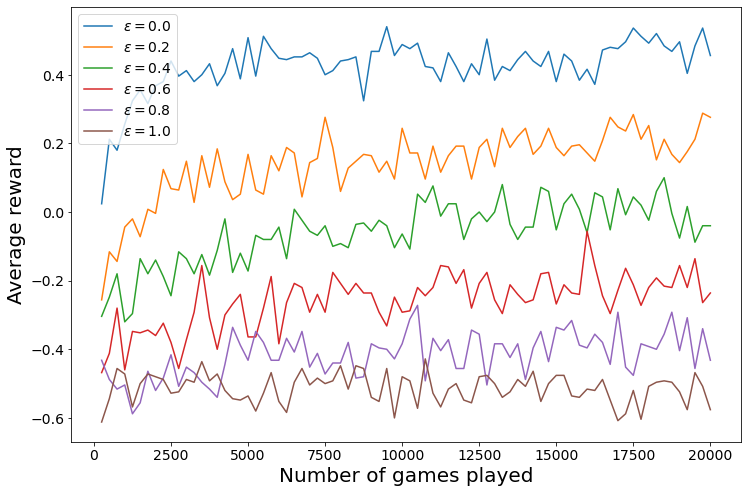

In [7]:
plt.figure(figsize=(12, 8))

for epsilon in epsilon_list:
    game_idx = list(avg_reward_epsilons[epsilon].keys())
    avg_rewards = list(avg_reward_epsilons[epsilon].values())
 
    plt.plot(game_idx,avg_rewards,label = "$\epsilon=$"+str(epsilon))
    
plt.legend()
plt.xlabel("Number of games played")
plt.ylabel("Average reward")

plt.savefig("plot/question1.pdf",dpi=300)
plt.show()


### 2.1.1 Decreasing exploration

In [8]:
random.seed(2022)

player_opt_for_train = OptimalPlayer(epsilon=0.5)

n_star_list = [1, 100, 1000, 10000, 20000, 40000]
avg_reward_record_dict = {}
metrics_dict = {"M_opt": {}, "M_rand": {}}
for n_star in n_star_list:
    print("start training with n^star = {}".format(n_star))
    player_qlearning = QPlayer(
        player="X", epsilon_min=0.1, epsilon_max=0.8, n_star=n_star
    )

    avg_reward_record, metrics = train_from_expert(
        player_qlearning, player_opt_for_train, decrease_epsilon=True, compute_metrics=True
    )

    avg_reward_record_dict.update({n_star: avg_reward_record})
    metrics_dict["M_opt"].update({n_star: metrics["M_opt"]})
    metrics_dict["M_rand"].update({n_star: metrics["M_rand"]})


start training with n^star = 1


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:45<00:00, 88.64it/s]


start training with n^star = 100


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:47<00:00, 87.83it/s]


start training with n^star = 1000


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:51<00:00, 86.24it/s]


start training with n^star = 10000


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:49<00:00, 87.15it/s]


start training with n^star = 20000


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:52<00:00, 85.94it/s]


start training with n^star = 40000


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:53<00:00, 85.55it/s]


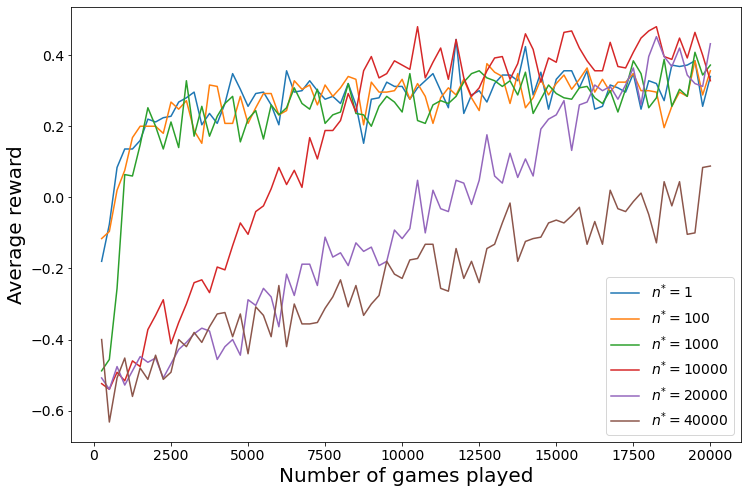

In [9]:
plt.figure(figsize=(12, 8))

for n_star in n_star_list:
    game_idx = list(avg_reward_record_dict[n_star].keys())
    avg_rewards = list(avg_reward_record_dict[n_star].values())
    plt.plot(game_idx,avg_rewards,label = "$n^{*}=$"+str(n_star))

plt.legend()
plt.xlabel("Number of games played")
plt.ylabel("Average reward")

plt.savefig("plot/question2.pdf",dpi=300)
plt.show()

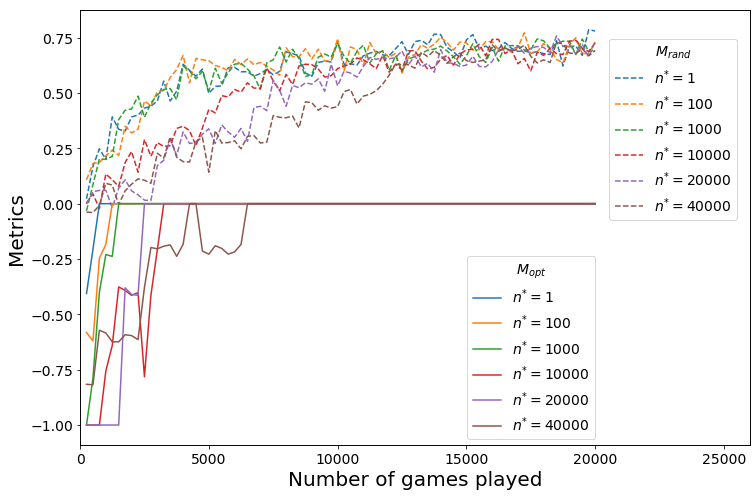

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

for n_star in n_star_list:
    game_idx = list(metrics_dict["M_rand"][n_star].keys())
    M_rand = list(metrics_dict["M_rand"][n_star].values())
    ax.plot(game_idx,M_rand,'--',label = "$n^{*}=$"+str(n_star))
ax.legend(title = '$M_{rand}$', bbox_to_anchor = (0.78, 0.95))

ax2 = ax.twiny()
for n_star in n_star_list:
    game_idx = list(metrics_dict["M_opt"][n_star].keys())
    M_opt = list(metrics_dict["M_opt"][n_star].values())
    ax2.plot(game_idx,M_opt,'-',label = "$n^{*}=$"+str(n_star))
ax2.legend(title = '$M_{opt}$', bbox_to_anchor = (0.78, 0.45))
ax2.get_xaxis().set_visible(False) 

ax.set_xlabel("Number of games played")
ax.set_xlim([0,26000])
ax2.set_xlim([0,26000])
ax.xaxis.set_ticks(np.arange(0,26000,5000))
ax.set_ylabel("Metrics")

plt.savefig("plot/question3.pdf",dpi=300)
plt.show()

### 2.1.2 Good experts and bad experts

In [11]:
random.seed(2022)

sample_number = 6
epsilon_expert_list = []
for i in range(sample_number):
    epsilon_expert_list.append(i/(sample_number-1))

best_n_star = 10000
    
avg_reward_record_dict = {}
metrics_dict = {"M_opt": {}, "M_rand": {}}
for epsilon_expert in epsilon_expert_list:
    print("start training with expert whose epsilton is {}".format(epsilon_expert))
    
    player_qlearning = QPlayer(
        player="X", epsilon_min=0.1, epsilon_max=0.8, n_star=best_n_star
    )
    player_opt_for_train = OptimalPlayer(epsilon=epsilon_expert)

    avg_reward_record, metrics = train_from_expert(
        player_qlearning, player_opt_for_train, decrease_epsilon=True, compute_metrics=True
    )

    avg_reward_record_dict.update({epsilon_expert: avg_reward_record})
    metrics_dict["M_opt"].update({epsilon_expert: metrics["M_opt"]})
    metrics_dict["M_rand"].update({epsilon_expert: metrics["M_rand"]})
    
    if epsilon_expert == 0.0:
        Q_table1 = player_qlearning.q_table
    elif epsilon_expert == 1.0:
        Q_table2 = player_qlearning.q_table

start training with expert whose epsilton is 0.0


100%|██████████████████████████████████████████████████████████| 20000/20000 [04:27<00:00, 74.69it/s]


start training with expert whose epsilton is 0.2


100%|██████████████████████████████████████████████████████████| 20000/20000 [04:20<00:00, 76.74it/s]


start training with expert whose epsilton is 0.4


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:58<00:00, 84.03it/s]


start training with expert whose epsilton is 0.6


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:39<00:00, 91.00it/s]


start training with expert whose epsilton is 0.8


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:24<00:00, 97.80it/s]


start training with expert whose epsilton is 1.0


100%|█████████████████████████████████████████████████████████| 20000/20000 [03:09<00:00, 105.51it/s]


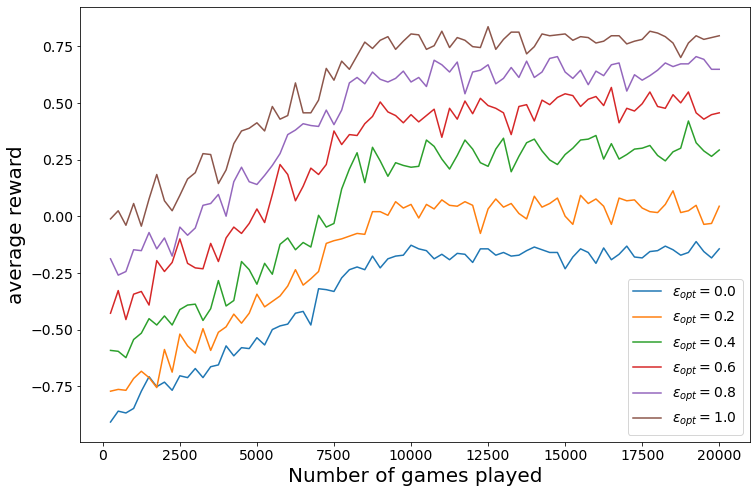

In [12]:
plt.figure(figsize=(12, 8))

for epsilon_expert in epsilon_expert_list:
    game_idx = list(avg_reward_record_dict[epsilon_expert].keys())
    avg_rewards = list(avg_reward_record_dict[epsilon_expert].values())
    plt.plot(game_idx,avg_rewards,label = "$\epsilon_{opt}=$"+str(epsilon_expert))

plt.legend()
plt.xlabel("Number of games played")
plt.ylabel("average reward")

plt.show()

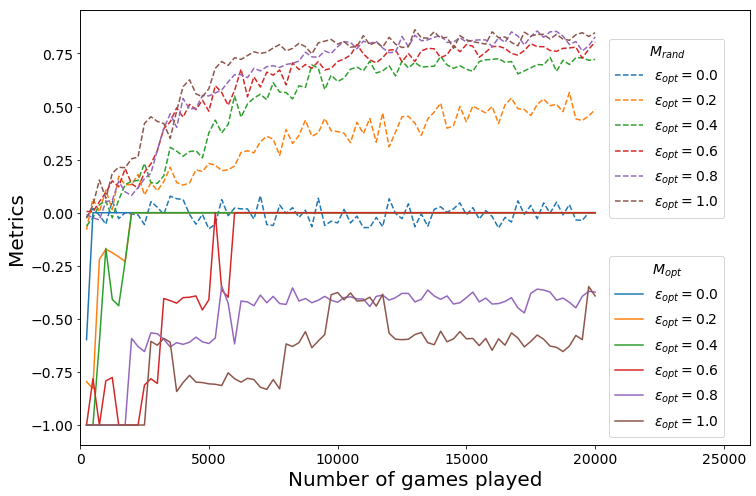

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

for epsilon_expert in epsilon_expert_list:
    game_idx = list(metrics_dict["M_rand"][epsilon_expert].keys())
    M_rand = list(metrics_dict["M_rand"][epsilon_expert].values())
    ax.plot(game_idx,M_rand,'--',label = "$\epsilon_{opt}=$"+str(epsilon_expert))
ax.legend(title = '$M_{rand}$', bbox_to_anchor = (0.78, 0.95))

ax2 = ax.twiny()
for epsilon_expert in epsilon_expert_list:
    game_idx = list(metrics_dict["M_opt"][epsilon_expert].keys())
    M_opt = list(metrics_dict["M_opt"][epsilon_expert].values())
    ax2.plot(game_idx,M_opt,'-',label = "$\epsilon_{opt}=$"+str(epsilon_expert))
ax2.legend(title = '$M_{opt}$', bbox_to_anchor = (0.78, 0.45))
ax2.get_xaxis().set_visible(False) 

ax.set_xlabel("Number of games played")
ax.set_xlim([0,26000])
ax2.set_xlim([0,26000])
ax.xaxis.set_ticks(np.arange(0,26000,5000))
ax.set_ylabel("Metrics")

plt.savefig("plot/question4.pdf",dpi=300)
plt.show()

In [14]:
# question5
max_metric = {"opt": -1, "rand": -1}
for epsilon_expert in epsilon_expert_list:
    if max_metric["opt"] < metrics_dict["M_opt"][epsilon_expert][20000]:
        max_metric["opt"] = metrics_dict["M_opt"][epsilon_expert][20000]
        
    if max_metric["rand"] < metrics_dict["M_rand"][epsilon_expert][20000]:
        max_metric["rand"] = metrics_dict["M_rand"][epsilon_expert][20000]
        max_rand_epsilon = epsilon_expert
print("Highest M_opt is: {}".format(max_metric["opt"]))
print("Highest M-rand is: {}. Corresponding epsilon is: {}".format(max_metric["rand"],max_rand_epsilon))

Highest M_opt is: 0.0
Highest M-rand is: 0.848. Corresponding epsilon is: 1.0


In [15]:
# question 6
def print_q_table(state: "Tuple[int]", Q_table1: dict, Q_table2: dict):
    print("*****Q_table for the following grid is:******")
    value2player = {0: '-', 1: 'X', -1: 'O'}
    grid = np.array(state).reshape(3,3)
    for i in range(3):
        print('|', end='')
        for j in range(3):
            print(value2player[int(grid[i,j])], end=' ' if j<2 else '')
        print('|')
    print()
    print("Q1: ")
    print(Q_table1[state])
    print("Q2: ")
    print(Q_table2[state])
    
print_q_table((0,0,0,0,1,0,-1,0,1), Q_table1, Q_table2)
print_q_table((1, 0, -1, 1, 0, 0, 0, -1, 0), Q_table1, Q_table2)
print_q_table((1, 0, -1, 0, 0, 0, 0, 1, 0), Q_table1, Q_table2)

*****Q_table for the following grid is:******
|- - -|
|- X -|
|O - X|

Q1: 
{0: 0.0, 1: -0.8647240457209439, 2: -0.9434383726497471, 3: -0.9404614448944706, 5: -0.9269022734871225, 7: -0.9404614448944706}
Q2: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 5: -0.0975, 7: 0.0}
*****Q_table for the following grid is:******
|X - O|
|X - -|
|- O -|

Q1: 
{1: 0, 4: 0, 5: 0, 6: 0, 8: 0}
Q2: 
{1: 0.0, 4: 0, 5: 0, 6: 0.36975059027539064, 8: 0.009293625}
*****Q_table for the following grid is:******
|X - O|
|- - -|
|- X -|

Q1: 
{1: 0, 3: 0, 4: 0, 5: 0, 6: 0, 8: 0}
Q2: 
{1: 0.008518099825786376, 3: 0.00034946690625000006, 4: 0.0, 5: 0.0, 6: 0.03526214998116825, 8: 0.7571498133295368}


## 2.2 Learning by self-practice

In [25]:
def train_by_self(
    player_qlearning1: QPlayer,
    player_qlearning2: QPlayer,
    record_inter: int = 250,
    decrease_epsilon: bool = False,
    compute_metrics: bool = True,
) -> Dict:
    
    env = TictactoeEnv()
    
    player_opt = OptimalPlayer(epsilon=0)
    player_rand = OptimalPlayer(epsilon=1)
    player_qlearning1.player = "X"
    player_qlearning2.player = "O"
    player_qlearning_eval = QPlayer(player="X", epsilon_min=0, epsilon_max=0)
    
    # make sure they use the same q_table
    player_qlearning2.q_table = player_qlearning1.q_table
    player_qlearning_eval.q_table = player_qlearning1.q_table
    
    if compute_metrics:
        metrics = {"M_opt": {}, "M_rand": {}}
    
    for i in tqdm(range(20000)):
        env.reset()
        grid, end, winner = env.observe()
        
        first_step = True
        while not end:
            if env.current_player == player_qlearning1.player:
                if decrease_epsilon:
                    move = player_qlearning1.act(grid, n=i+1)
                else:
                    move = player_qlearning1.act(grid)
            elif env.current_player == player_qlearning2.player:
                if decrease_epsilon:
                    move = player_qlearning2.act(grid, n=i+1)
                else:
                    move = player_qlearning2.act(grid)
            else:
                raise Exception("none of the player is match!")

            grid, end, winner = env.step(move, print_grid=False)
            reward1 = env.reward(player_qlearning1.player)
            reward2 = env.reward(player_qlearning2.player)

            if first_step:
                first_step = False
                continue
            elif env.current_player == player_qlearning1.player:
                player_qlearning1.update_q(reward=reward1, grid=grid, is_end=end)
                if end:
                    player_qlearning2.update_q(reward=reward2,grid=grid,is_end=end)
            else:
                player_qlearning2.update_q(reward=reward2,grid=grid,is_end=end)
                if end:
                    player_qlearning1.update_q(reward=reward1, grid=grid, is_end=end)

        if ((i + 1) % record_inter == 0) & (i != 0):
            if compute_metrics:
                metrics["M_opt"].update({i + 1: eval_metrics(player_qlearning_eval, player_opt)})
                metrics["M_rand"].update({i + 1: eval_metrics(player_qlearning_eval, player_rand)})
    if compute_metrics:
        return metrics

### learning with fixed epsilon

In [17]:
random.seed(2022)

sample_number = 6
epsilon_list = []
for i in range(sample_number):
    epsilon_list.append(i / (sample_number - 1))

metrics_dict = {"M_opt": {}, "M_rand": {}}
for epsilon in epsilon_list:
    print("start training with epsilton = {}".format(epsilon))
    player_qlearning1 = QPlayer(player="X", epsilon_min=epsilon, epsilon_max=epsilon)
    player_qlearning2 = QPlayer(player="O", epsilon_min=epsilon, epsilon_max=epsilon)
    
    metrics = train_by_self(player_qlearning1, player_qlearning2)

    metrics_dict["M_opt"].update({epsilon: metrics["M_opt"]})
    metrics_dict["M_rand"].update({epsilon: metrics["M_rand"]})


start training with epsilton = 0.0


100%|█████████████████████████████████████████████████████████| 20000/20000 [02:59<00:00, 111.63it/s]


start training with epsilton = 0.2


100%|█████████████████████████████████████████████████████████| 20000/20000 [03:18<00:00, 100.90it/s]


start training with epsilton = 0.4


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:27<00:00, 96.31it/s]


start training with epsilton = 0.6


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:30<00:00, 94.96it/s]


start training with epsilton = 0.8


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:37<00:00, 91.81it/s]


start training with epsilton = 1.0


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:39<00:00, 90.98it/s]


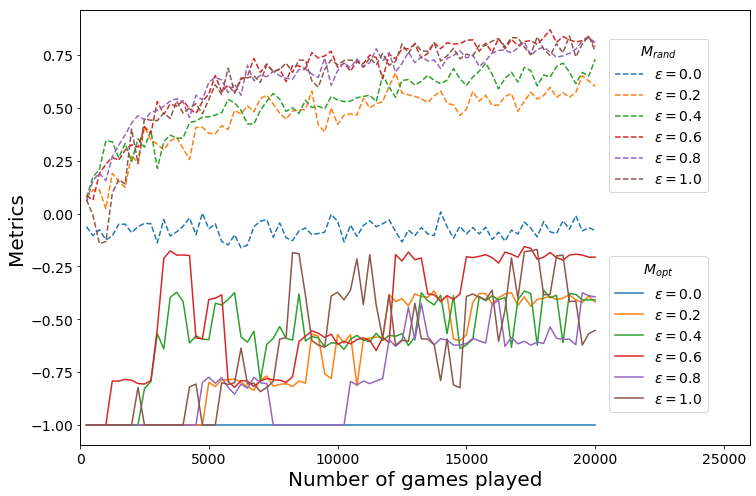

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

for epsilon in epsilon_list:
    game_idx = list(metrics_dict["M_rand"][epsilon].keys())
    M_rand = list(metrics_dict["M_rand"][epsilon].values())
    ax.plot(game_idx,M_rand,'--',label = "$\epsilon=$"+str(epsilon))
ax.legend(title = '$M_{rand}$', bbox_to_anchor = (0.78, 0.95))

ax2 = ax.twiny()
for epsilon in epsilon_list:
    game_idx = list(metrics_dict["M_opt"][epsilon].keys())
    M_opt = list(metrics_dict["M_opt"][epsilon].values())
    ax2.plot(game_idx,M_opt,'-',label = "$\epsilon=$"+str(epsilon))
ax2.legend(title = '$M_{opt}$', bbox_to_anchor = (0.78, 0.45))
ax2.get_xaxis().set_visible(False) 

ax.set_xlabel("Number of games played")
ax.set_xlim([0,26000])
ax2.set_xlim([0,26000])
ax.xaxis.set_ticks(np.arange(0,26000,5000))
ax.set_ylabel("Metrics")

plt.savefig("plot/question7.pdf",dpi=300)
plt.show()

### Learning with decreasing exploration

In [19]:
random.seed(2022)

n_star_list = [1, 100, 1000, 10000, 20000, 40000]

metrics_dict = {"M_opt": {}, "M_rand": {}}
for n_star in n_star_list:
    print("start training with n_star = {}".format(n_star))
    player_qlearning1 = QPlayer(player="X", epsilon_min=0.1, epsilon_max=0.8, n_star=n_star)
    player_qlearning2 = QPlayer(player="O", epsilon_min=0.1, epsilon_max=0.8, n_star=n_star)

    metrics = train_by_self(player_qlearning1, player_qlearning2, decrease_epsilon=True)
    
    metrics_dict["M_opt"].update({n_star: metrics["M_opt"]})
    metrics_dict["M_rand"].update({n_star: metrics["M_rand"]})


start training with n_star = 1


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:29<00:00, 95.42it/s]


start training with n_star = 100


100%|█████████████████████████████████████████████████████████| 20000/20000 [03:07<00:00, 106.40it/s]


start training with n_star = 1000


100%|█████████████████████████████████████████████████████████| 20000/20000 [03:07<00:00, 106.48it/s]


start training with n_star = 10000


100%|█████████████████████████████████████████████████████████| 20000/20000 [03:09<00:00, 105.53it/s]


start training with n_star = 20000


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:37<00:00, 91.97it/s]


start training with n_star = 40000


100%|██████████████████████████████████████████████████████████| 20000/20000 [03:28<00:00, 96.06it/s]


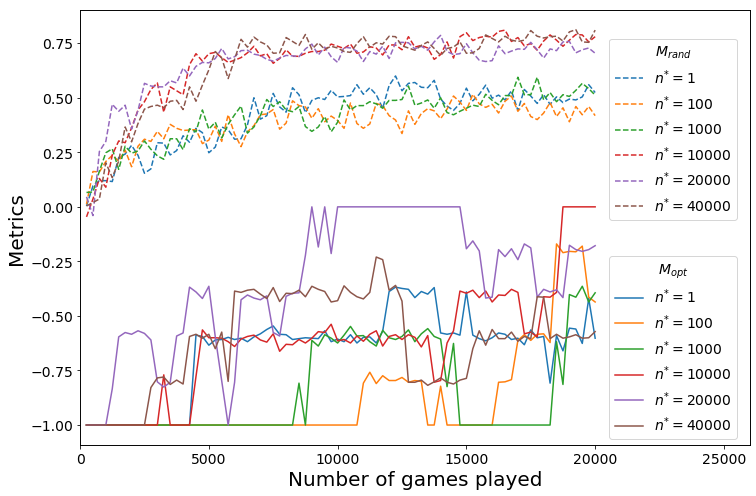

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

for n_star in n_star_list:
    game_idx = list(metrics_dict["M_rand"][n_star].keys())
    M_rand = list(metrics_dict["M_rand"][n_star].values())
    ax.plot(game_idx,M_rand,'--',label = "$n^{*}=$"+str(n_star))
ax.legend(title = '$M_{rand}$', bbox_to_anchor = (0.78, 0.95))

ax2 = ax.twiny()
for n_star in n_star_list:
    game_idx = list(metrics_dict["M_opt"][n_star].keys())
    M_opt = list(metrics_dict["M_opt"][n_star].values())
    ax2.plot(game_idx,M_opt,'-',label = "$n^{*}=$"+str(n_star))
ax2.legend(title = '$M_{opt}$', bbox_to_anchor = (0.78, 0.45))
ax2.get_xaxis().set_visible(False) 

ax.set_xlabel("Number of games played")
ax.set_xlim([0,26000])
ax2.set_xlim([0,26000])
ax.xaxis.set_ticks(np.arange(0,26000,5000))
ax.set_ylabel("Metrics")

plt.savefig("plot/question8.pdf",dpi=300)
plt.show()

In [21]:
# question 9
max_metric = {"opt": -1, "rand": -1}
for n_star in n_star_list:
    if max_metric["opt"] < metrics_dict["M_opt"][n_star][20000]:
        max_metric["opt"] = metrics_dict["M_opt"][n_star][20000]
        max_n_star_opt = n_star
        
    if max_metric["rand"] < metrics_dict["M_rand"][n_star][20000]:
        max_metric["rand"] = metrics_dict["M_rand"][n_star][20000]
        max_n_star_rand = n_star
        
print("Highest M_opt is: {}. Corresponding n_star is: {}".format(max_metric["opt"],max_n_star_opt))
print("Highest M-rand is: {}. Corresponding n_star is: {}".format(max_metric["rand"],max_n_star_rand))

Highest M_opt is: 0.0. Corresponding n_star is: 10000
Highest M-rand is: 0.81. Corresponding n_star is: 40000


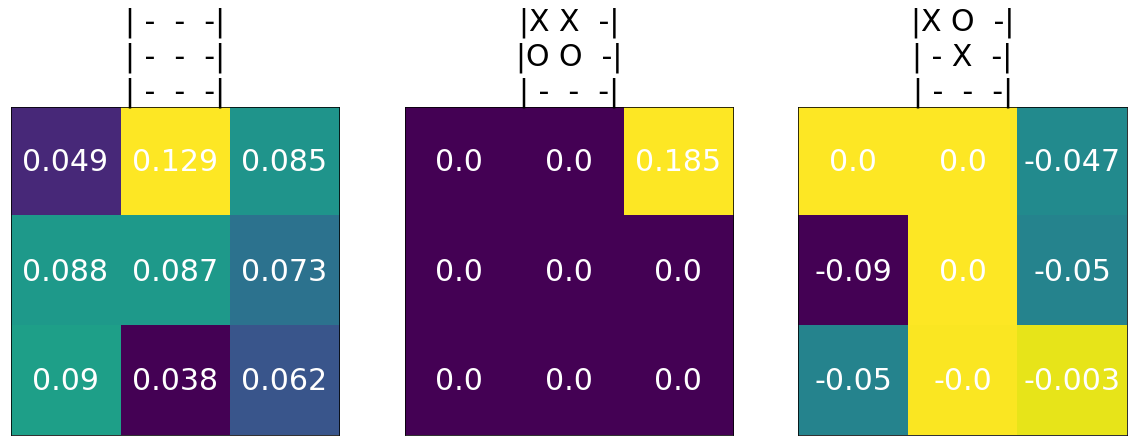

In [39]:
# question 10
# Visualize Q-values

random.seed(2022)

# best_n_star = 20000
# player_qlearning1 = QPlayer(player="X", epsilon_min=0.1, epsilon_max=0.8, n_star=best_n_star)
# player_qlearning2 = QPlayer(player="O", epsilon_min=0.1, epsilon_max=0.8, n_star=best_n_star)
# train_by_self(player_qlearning1, player_qlearning2, decrease_epsilon=True, compute_metrics=False)
    

def print_q_table(state: "Tuple[int]", Q_table1: dict, Q_table2: dict):
    print("*****Q_table for the following grid is:******")
    value2player = {0: '-', 1: 'X', -1: 'O'}
    grid = np.array(state).reshape(3,3)
    for i in range(3):
        print('|', end='')
        for j in range(3):
            print(value2player[int(grid[i,j])], end=' ' if j<2 else '')
        print('|')
    print()
    print("Q1: ")
    print(Q_table1[state])
    print("Q2: ")
    print(Q_table2[state])
    
state1 = (0,0,0,0,0,0,0,0,0)
state2 = (1,1,0,-1,-1,0,0,0,0)
state3 = (1,-1,0,0,1,0,0,0,0)
states = [state1, state2, state3]


fig, axes = plt.subplots(1,3,figsize=(20, 8))

value2player = {0: ' -', 1: 'X', -1: 'O'}

for idx,state in enumerate(states):
    q_table = np.zeros((3,3))
    for action in list(player_qlearning1.q_table[state].keys()):
        q_table[action//3, action%3] = player_qlearning1.q_table[state][action]
    
    im = axes[idx].imshow(q_table)
    axes[idx].get_xaxis().set_visible(False)
    axes[idx].get_yaxis().set_visible(False)
    state_symbol = []
    for value in list(state):
        state_symbol.append(value2player[value])
    axes[idx].set_title('|{0} {1} {2}|\n|{3} {4} {5}|\n|{6} {7} {8}|'.format(*state_symbol), fontsize = 30)
    
    for i in range(3):
        for j in range(3):
            text = axes[idx].text(j, i, round(q_table[i, j],3),
                           ha="center", va="center", color="w", fontsize=30)
            
plt.savefig("plot/question10.pdf",dpi=300)
plt.show()

# 3. Deep Q-Learning

In [1]:
# std
import os
from typing import List, Dict, Tuple

# imported
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# customized
from tic_env import TictactoeEnv, OptimalPlayer
from dqn_player import DQNPlayer, setup_seed
from dqn_utils import *
from viz_utils import (
    window_avg_plot, 
    reward_loss_plots, 
    metrics_plots, 
    mul_metrics_plots,
    mul_reward_loss_plots
)

In [2]:
os.makedirs('plot', exist_ok=True)
os.makedirs('res', exist_ok=True)

In [3]:
# set up for plt
SMALL_SIZE = 14
MEDIUM_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

## 3.1 Learning from experts

### Q11 Standard training with fixed  $\epsilon$ 

In [11]:
# setup seed for random, numpy, and torch
setup_seed(2022)

save_prefix = 'question11'
val_interval = 250

save_single = False
save_all = True

losses_dict = {}
rewards_dict = {}
metrics_dict = {"M_opt": {}, "M_rand": {}}
epsilon_list = [i / 5.0 for i in range(5)]

In [12]:
for idx, eps in enumerate(epsilon_list):
    print(f'{idx+1}/{len(epsilon_list)}: eps = {eps}')

    dqn_player = DQNPlayer(epsilon=eps, batch_sz=64, buffer_sz=10000, verbose=False)
    expert = OptimalPlayer(0.5)
    rewards, losses = dqn_player.train(
        expert, nr_episodes=20000, val_interval=val_interval
    )

    ## data collection
    metrics_dict["M_opt"].update({eps: dqn_player.m_opts})
    metrics_dict["M_rand"].update({eps: dqn_player.m_rands})
    losses_dict.update({eps: losses})
    rewards_dict.update({eps: rewards})

    ## viz
    if save_single:
        reward_loss_plots(rewards, losses, save_dir='plot', save_fn=save_prefix)
        metrics_plots(
            dqn_player.m_opts,
            dqn_player.m_rands,
            val_interval=val_interval,
            save_dir='plot',
            save_fn=save_prefix,
        )
        inside_prefix = save_prefix + f'_eps{eps}'
        np.savez_compressed(
            os.path.join('res', inside_prefix),
            rewards=rewards,
            losses=losses,
            m_opts=dqn_player.m_opts,
            m_rands=dqn_player.m_rands,
        )

1/5: eps = 0.0


100%|██████████| 20000/20000 [06:04<00:00, 54.84it/s] 


2/5: eps = 0.2


100%|██████████| 20000/20000 [06:22<00:00, 52.24it/s] 


3/5: eps = 0.4


100%|██████████| 20000/20000 [06:22<00:00, 52.27it/s] 


4/5: eps = 0.6


100%|██████████| 20000/20000 [06:27<00:00, 51.61it/s] 


5/5: eps = 0.8


100%|██████████| 20000/20000 [06:20<00:00, 52.60it/s] 


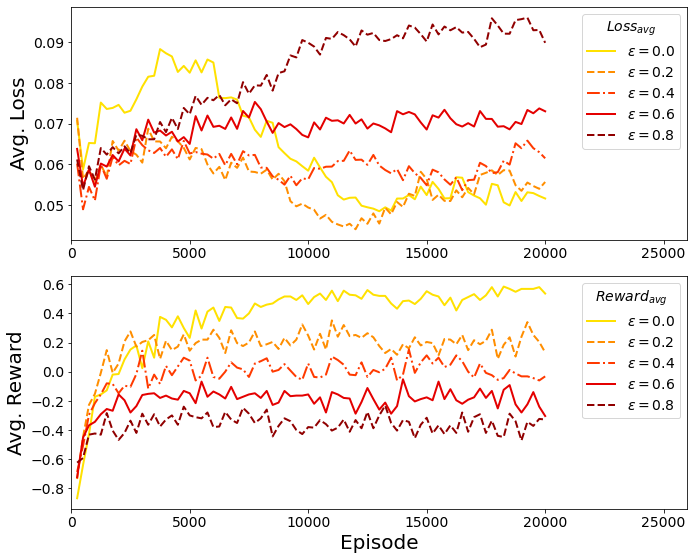

In [13]:
mul_reward_loss_plots(
    reward_dict=rewards_dict,
    loss_dict=losses_dict,
    val_list=epsilon_list,
    val4label='{\epsilon}',
    label_latex=True,
    figsize=(10, 8),
    save_dir='plot',
    save_fn=save_prefix,
)

### Q12 Training without the replay buffer and with a batch size of 1

In [14]:
# setup seed for random, numpy, and torch
setup_seed(2022)

save_prefix = 'question12'
val_interval = 250

save_single = False
save_all = True

losses_dict = {}
rewards_dict = {}
metrics_dict = {"M_opt": {}, "M_rand": {}}
epsilon_list = [i / 5.0 for i in range(5)]

In [17]:
for idx, eps in enumerate(epsilon_list):
    print(f'{idx+1}/{len(epsilon_list)}: eps = {eps}')

    dqn_player = DQNPlayer(epsilon=eps, batch_sz=64, buffer_sz=10000, verbose=False)
    expert = OptimalPlayer(0.5)
    rewards, losses = dqn_player.train(
        expert, nr_episodes=20000, val_interval=val_interval
    )

    ## data collection
    metrics_dict["M_opt"].update({eps: dqn_player.m_opts})
    metrics_dict["M_rand"].update({eps: dqn_player.m_rands})
    losses_dict.update({eps: losses})
    rewards_dict.update({eps: rewards})

    ## viz
    if save_single:
        reward_loss_plots(rewards, losses, save_dir='plot', save_fn=save_prefix)
        metrics_plots(
            dqn_player.m_opts,
            dqn_player.m_rands,
            val_interval=val_interval,
            save_dir='plot',
            save_fn=save_prefix,
        )
        inside_prefix = save_prefix + f'_eps{eps}'
        np.savez_compressed(
            os.path.join('res', inside_prefix),
            rewards=rewards,
            losses=losses,
            m_opts=dqn_player.m_opts,
            m_rands=dqn_player.m_rands,
        )

1/5: eps = 0.0


100%|██████████| 20000/20000 [05:36<00:00, 59.52it/s] 


2/5: eps = 0.2


100%|██████████| 20000/20000 [05:53<00:00, 56.65it/s] 


3/5: eps = 0.4


100%|██████████| 20000/20000 [05:56<00:00, 56.16it/s] 


4/5: eps = 0.6


100%|██████████| 20000/20000 [06:08<00:00, 54.24it/s] 


5/5: eps = 0.8


100%|██████████| 20000/20000 [06:04<00:00, 54.89it/s] 


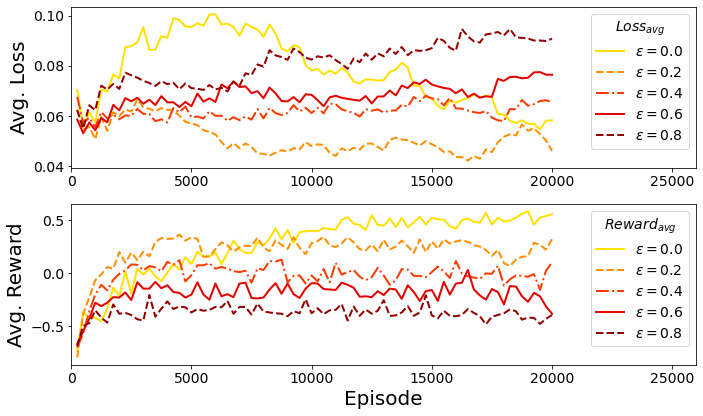

In [18]:
mul_reward_loss_plots(
    reward_dict=rewards_dict,
    loss_dict=losses_dict,
    val_list=epsilon_list,
    val4label='{\epsilon}',
    label_latex=True,
    figsize=(10, 6),
    save_dir='plot',
    save_fn=save_prefix,
)

### Q13 Training with decreasing $\epsilon$ given different values of $n*$

In [20]:
# setup seed for random, numpy, and torch
setup_seed(2022)

save_prefix = 'question13'
save_single = True
save_all = True

rewards_list = []
losses_list = []
metrics_dict = {"M_opt": {}, "M_rand": {}}

val_interval = 250
n_star_list = [1, 100, 1000, 10000, 20000, 40000]

In [21]:
expert = OptimalPlayer(0.5)
q13_dqn_players = [
    DQNPlayer(
        epsilon=0.01,
        buffer_sz=10000,
        batch_sz=64,
        explore=True,
        n_star=n_star,
        verbose=False,
    )
    for n_star in n_star_list
]

1/6: n_star = 1


100%|██████████| 20000/20000 [06:13<00:00, 53.53it/s] 


2/6: n_star = 100


100%|██████████| 20000/20000 [06:18<00:00, 52.83it/s] 


3/6: n_star = 1000


100%|██████████| 20000/20000 [06:29<00:00, 51.41it/s] 


4/6: n_star = 10000


100%|██████████| 20000/20000 [06:24<00:00, 52.08it/s] 


5/6: n_star = 20000


100%|██████████| 20000/20000 [06:25<00:00, 51.93it/s] 


6/6: n_star = 40000


100%|██████████| 20000/20000 [06:06<00:00, 54.52it/s] 


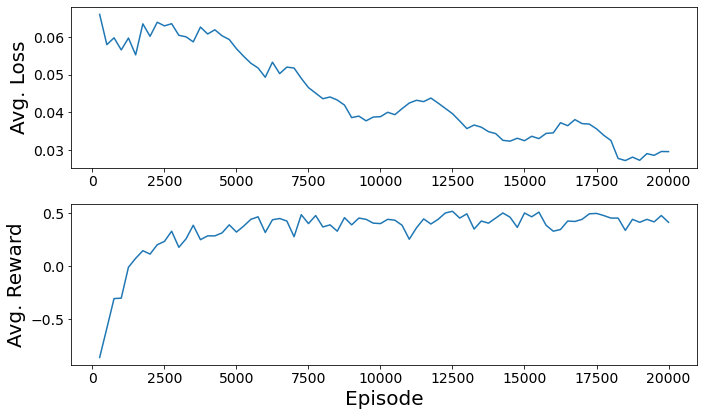

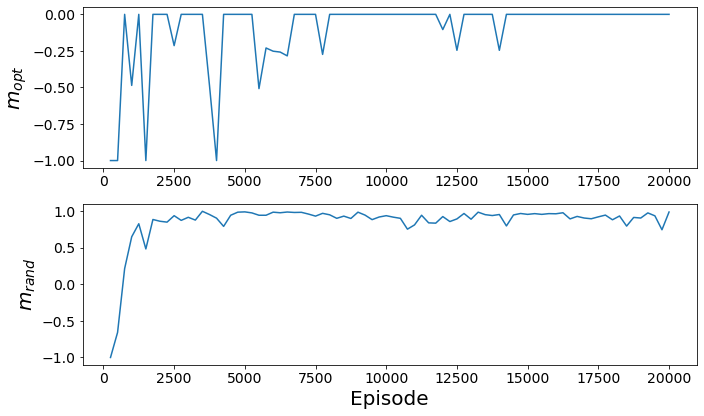

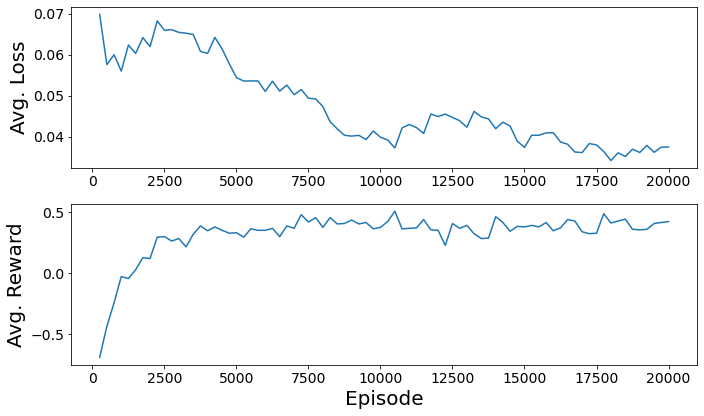

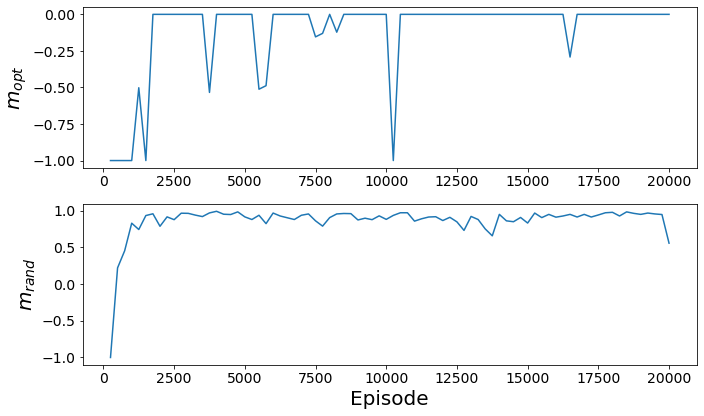

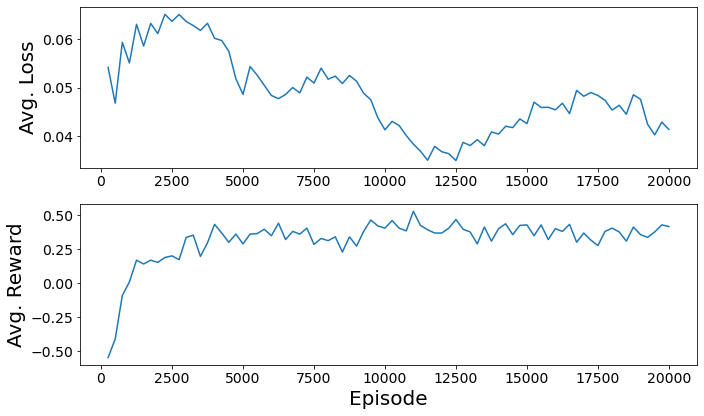

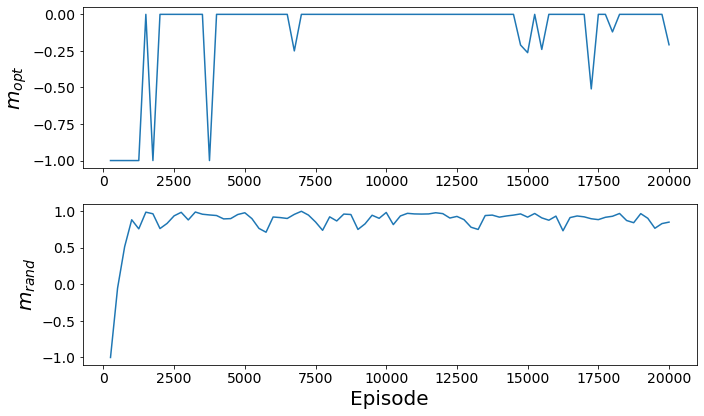

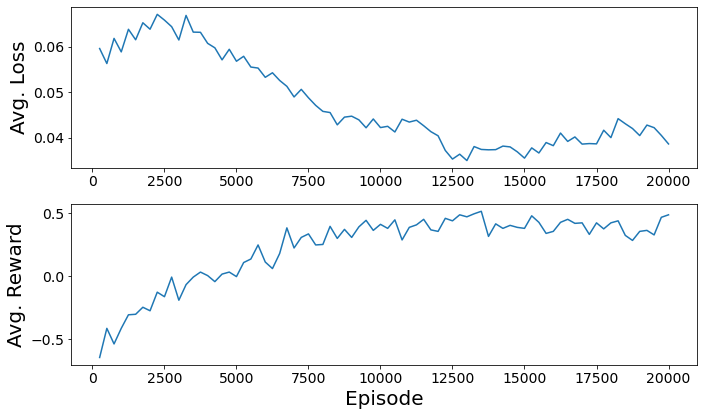

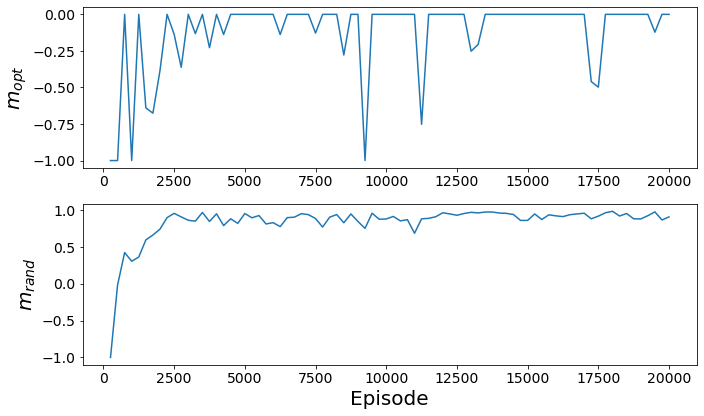

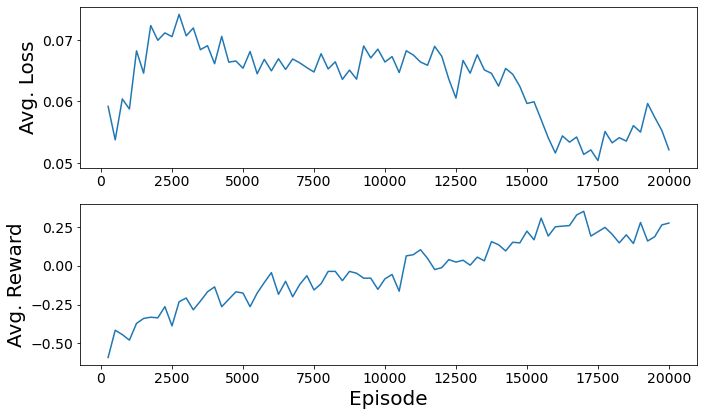

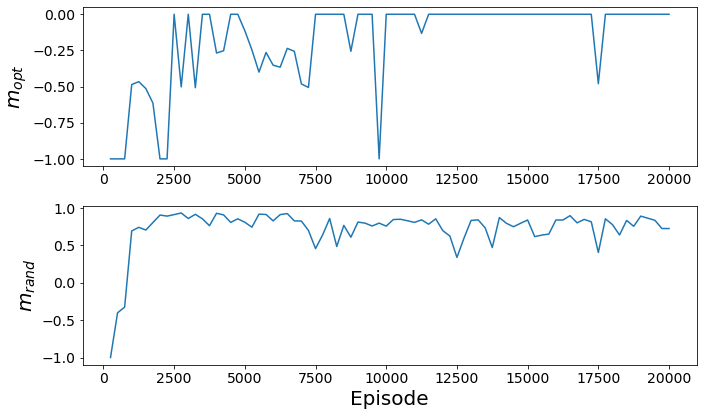

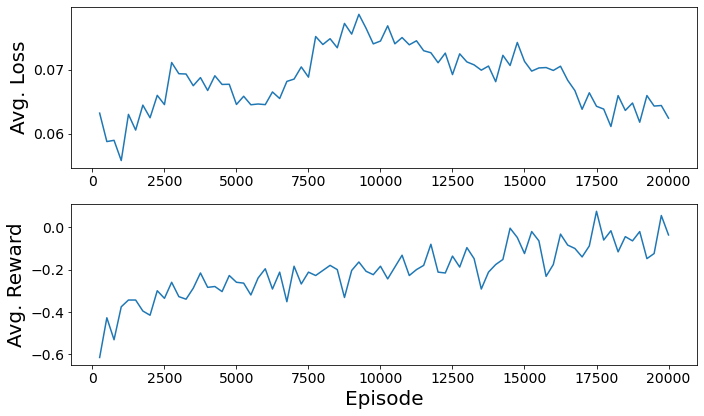

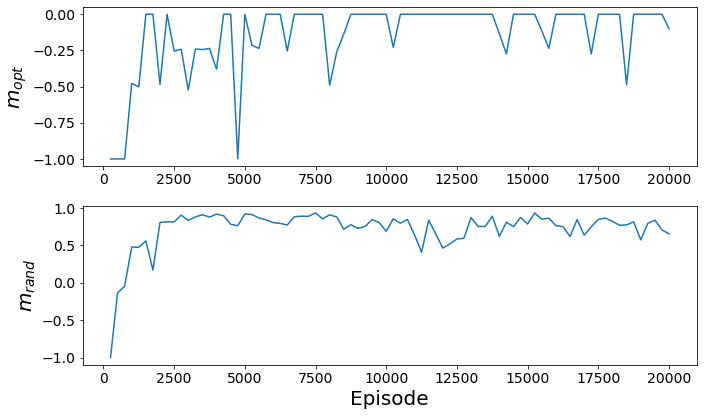

In [22]:
for idx, n_star in enumerate(n_star_list):
    print(f'{idx+1}/{len(n_star_list)}: n_star = {n_star}')
    dqn_player = q13_dqn_players[idx]
    rewards, losses = dqn_player.train(
        expert, nr_episodes=20000, val_interval=val_interval
    )

    ## data collection
    metrics_dict["M_opt"].update({n_star: dqn_player.m_opts})
    metrics_dict["M_rand"].update({n_star: dqn_player.m_rands})
    losses_dict.update({n_star: losses})
    rewards_dict.update({n_star: rewards})

    ## viz
    if save_single:
        inside_prefix = save_prefix + f'_n_star{n_star}'
        reward_loss_plots(rewards, losses, save_dir='plot', save_fn=inside_prefix)
        metrics_plots(
            dqn_player.m_opts,
            dqn_player.m_rands,
            val_interval=val_interval,
            save_dir='plot',
            save_fn=inside_prefix,
        )

        np.savez_compressed(
            os.path.join('res', inside_prefix),
            rewards=rewards,
            losses=losses,
            m_opts=dqn_player.m_opts,
            m_rands=dqn_player.m_rands,
        )
        # res = np.load(os.path.join('res', inside_prefix + '.npz'))

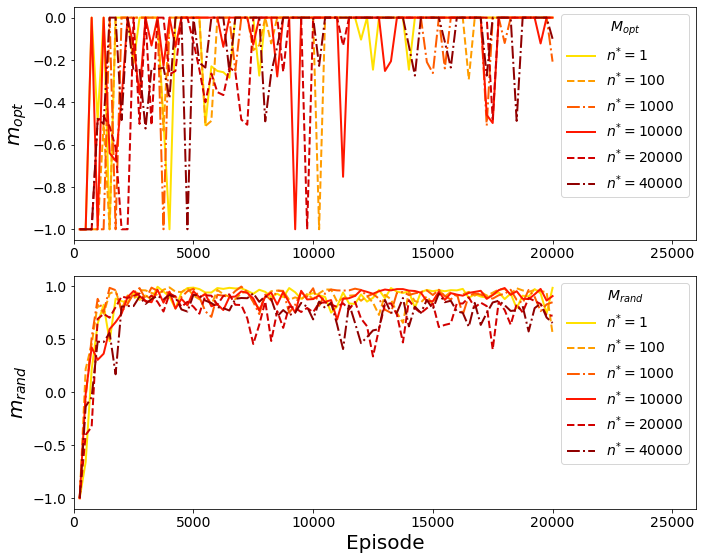

In [24]:
mul_metrics_plots(
    metrics_dict=metrics_dict,
    val_list=n_star_list,
    val4label='n^{*}',
    label_latex=True,
    figsize=(10, 8),
    save_dir='plot',
    save_fn=save_prefix,
)

### Q14 Training with different $\epsilon_{opt}$ given best value of $n*$

In [25]:
# setup seed for random, numpy, and torch
setup_seed(2022)

save_prefix = 'question14'
val_interval = 250
save_single = True
save_all = True

losses_dict = {}
rewards_dict = {}
rewards_list = []
losses_list = []
metrics_dict = {"M_opt": {}, "M_rand": {}}

In [26]:
sample_number = 6
epsilon_list = []
for i in range(sample_number):
    epsilon_list.append(i / (sample_number - 1))
chosen_n_star = 10000

In [27]:
dqn_players = [
    DQNPlayer(
        epsilon=0.01,
        buffer_sz=10000,
        batch_sz=64,
        explore=True,
        n_star=chosen_n_star,
        verbose=False,
    )
    for _ in range(sample_number)
]

1/6: eps_opt = 0.0


100%|██████████| 20000/20000 [07:25<00:00, 44.87it/s]


2/6: eps_opt = 0.2


100%|██████████| 20000/20000 [06:51<00:00, 48.61it/s]


3/6: eps_opt = 0.4


100%|██████████| 20000/20000 [06:35<00:00, 50.60it/s] 


4/6: eps_opt = 0.6


100%|██████████| 20000/20000 [06:12<00:00, 53.76it/s] 


5/6: eps_opt = 0.8


100%|██████████| 20000/20000 [05:58<00:00, 55.81it/s] 


6/6: eps_opt = 1.0


100%|██████████| 20000/20000 [05:41<00:00, 58.65it/s] 


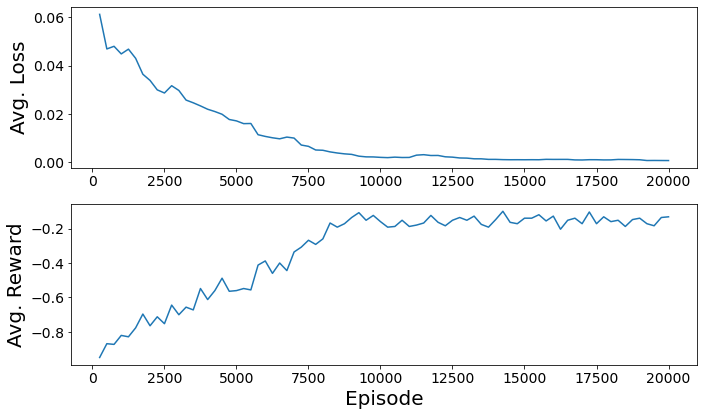

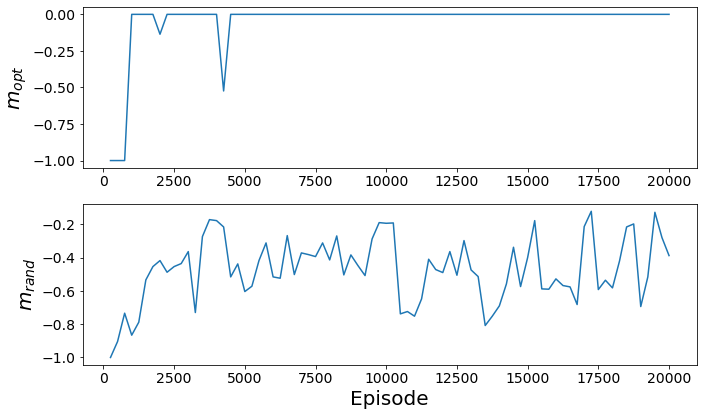

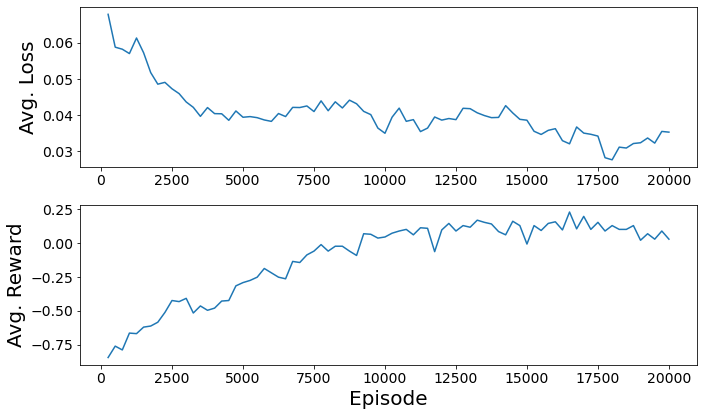

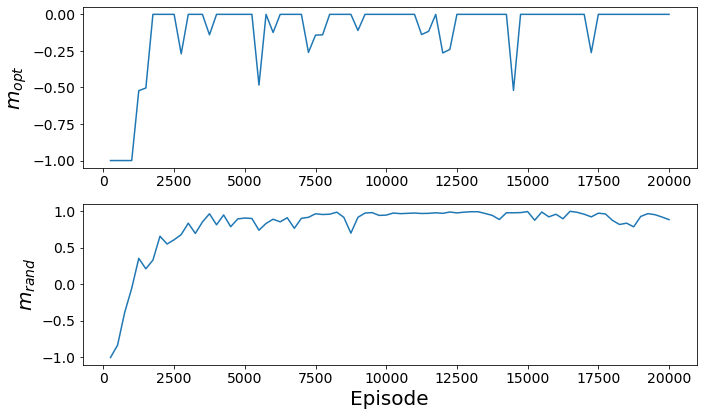

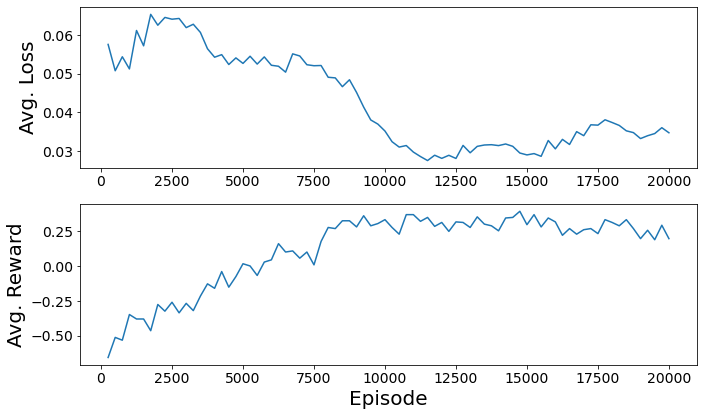

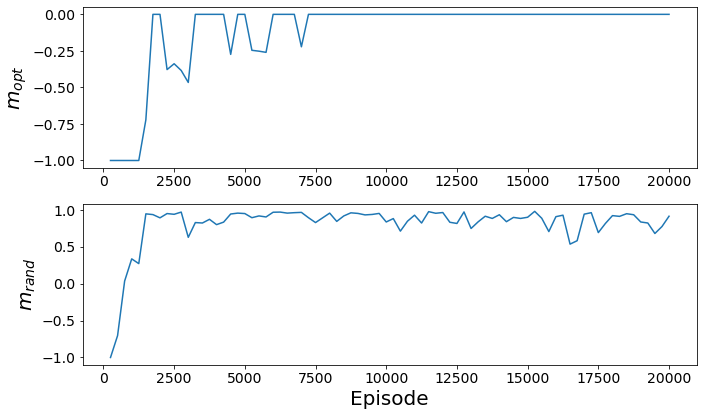

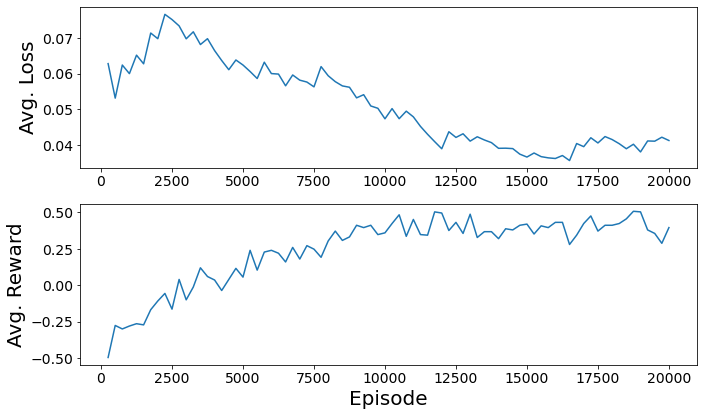

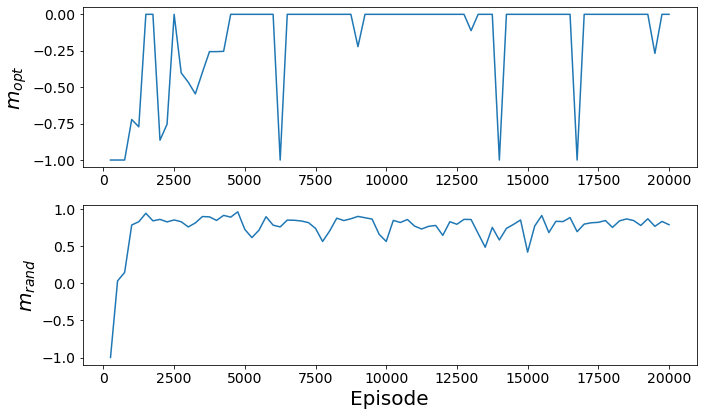

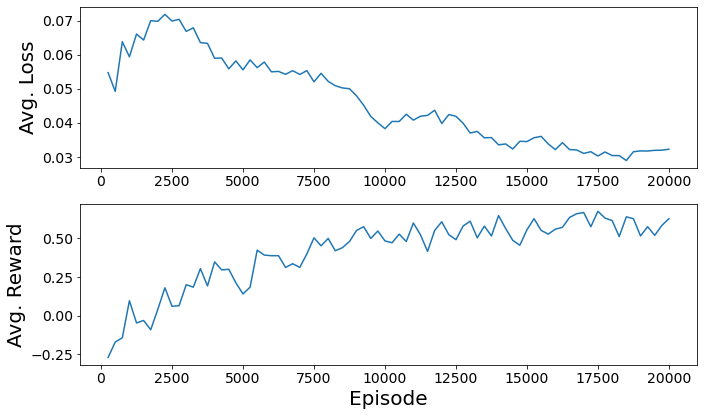

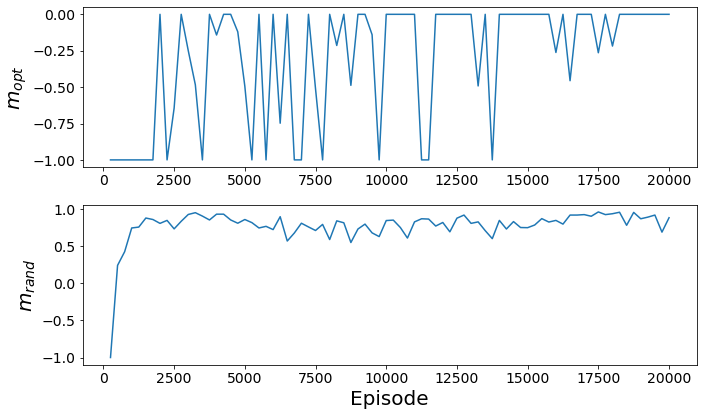

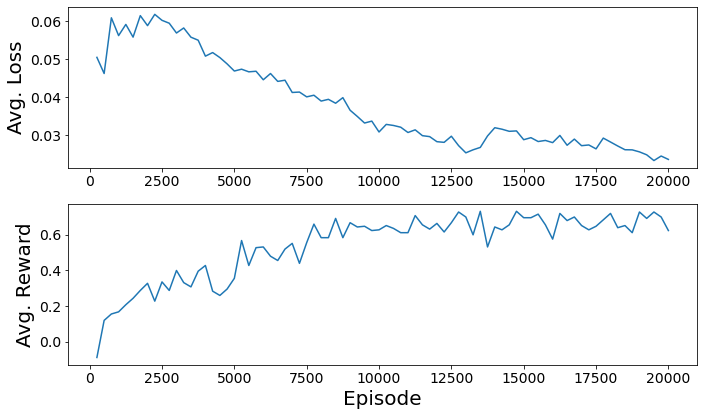

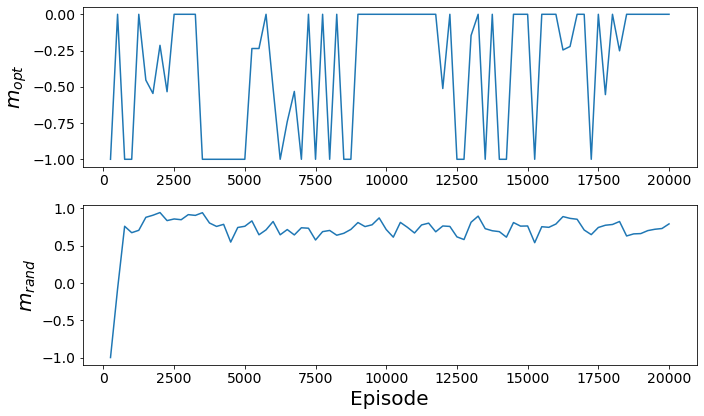

In [28]:
for idx, eps_opt in enumerate(epsilon_list):
    dqn_player = dqn_players[idx]
    print(f'{idx+1}/{sample_number}: eps_opt = {eps_opt}')
    expert = OptimalPlayer(epsilon=eps_opt)
    rewards, losses = dqn_player.train(
        expert, nr_episodes=20000, val_interval=val_interval
    )

    ## data collection
    metrics_dict["M_opt"].update({eps_opt: dqn_player.m_opts})
    metrics_dict["M_rand"].update({eps_opt: dqn_player.m_rands})
    losses_dict.update({eps_opt: losses})
    rewards_dict.update({eps_opt: rewards})

    ## viz
    if save_single:
        inside_prefix = save_prefix + f'_eps_opt{eps_opt}'
        reward_loss_plots(rewards, losses, save_dir='plot', save_fn=inside_prefix)
        metrics_plots(
            dqn_player.m_opts,
            dqn_player.m_rands,
            val_interval=val_interval,
            save_dir='plot',
            save_fn=inside_prefix,
        )

        np.savez_compressed(
            os.path.join('res', inside_prefix),
            rewards=rewards,
            losses=losses,
            m_opts=dqn_player.m_opts,
            m_rands=dqn_player.m_rands,
        )
        # res = np.load(os.path.join('res', inside_prefix + '.npz'))

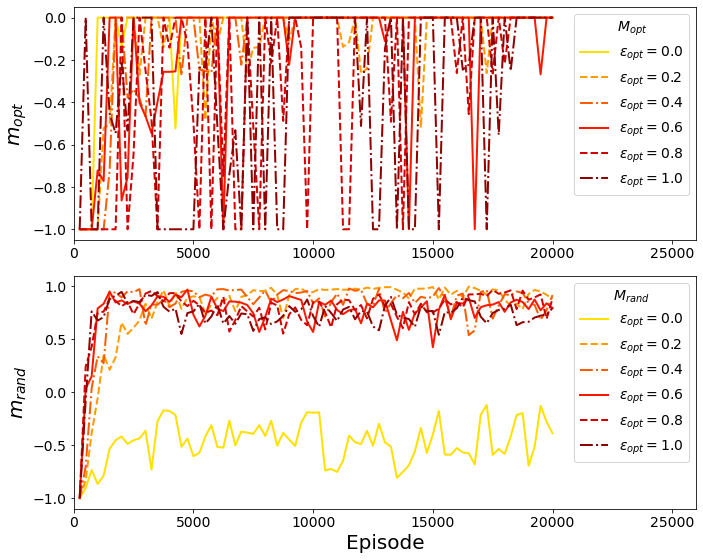

In [30]:
mul_metrics_plots(
    metrics_dict=metrics_dict,
    val_list=epsilon_list,
    val4label='{\epsilon}_{opt}',
    label_latex=True,
    figsize=(10, 8),
    save_dir='plot',
    save_fn=save_prefix,
)

### Q15 Reporting best results

## 3.2 Learning by self-practice

### Q16 Training with different fixed  $\epsilon$

### Q17 Training with decreasing  $\epsilon$ given different values of $n*$

In [ ]:
# setup seed for random, numpy, and torch
setup_seed(2022)

save_prefix = 'question17'
save_single = True
save_all = True

val_interval = 250
n_star_list = [1, 100, 1000, 10000, 20000, 40000]

rewards_list = []
losses_list = []
metrics_dict = {"M_opt": {}, "M_rand": {}}

In [ ]:
dqn_players = [
    DQNPlayer(
        epsilon=0.2,  # according to q16
        buffer_sz=10000,
        batch_sz=64,
        explore=True,
        n_star=n_star,
        verbose=False,
        eps_min=0.1,
        eps_max=0.8,
    )
    for n_star in n_star_list
]

In [ ]:
for idx, n_star in enumerate(n_star_list):
    print(f'{idx+1}/{len(n_star_list)}: n_star = {n_star}')
    dqn_player = dqn_players[idx]
    rewards, losses = dqn_player.self_train(
        nr_episodes=20000, val_interval=val_interval
    )

    ## data collection
    metrics_dict["M_opt"].update({n_star: dqn_player.m_opts})
    metrics_dict["M_rand"].update({n_star: dqn_player.m_rands})

    ## viz
    if save_single:
        inside_prefix = save_prefix + f'_n_star{n_star}'
        reward_loss_plots(rewards, losses, save_dir='plot', save_fn=inside_prefix)
        metrics_plots(
            dqn_player.m_opts,
            dqn_player.m_rands,
            val_interval=val_interval,
            save_dir='plot',
            save_fn=inside_prefix,
        )

        np.savez_compressed(
            os.path.join('res', inside_prefix),
            rewards=rewards,
            losses=losses,
            m_opts=dqn_player.m_opts,
            m_rands=dqn_player.m_rands,
        )
        # res = np.load(os.path.join('res', inside_prefix + '.npz'))

if save_all:
    mul_metrics_plots(
        metrics_dict=metrics_dict,
        val_list=n_star_list,
        val4label='n^{*}',
        label_latex=True,
        figsize=(10, 6),
        save_dir='plot',
        save_fn=save_prefix,
        include_max=include_max,
    )

### Q18 Reporting best results

### Q19 Visualizing Q values

# 4. Comparing Q-Learning with Deep Q-Learning

### Q20 Performance and training time comparison

> A table showing 12 values